In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/tempDir/'
replicate='LC_nov_locComp_1_4_17-16-44-4334/'
filename='tests.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)

Filepath: /home/ebb505/ARE_Project/are-logs/tempDir/LC_nov_locComp_1_4_17-16-44-4334/tests.csv


In [3]:
# Import data from csv
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[:-1]) # Last character is empty for some reason

In [4]:
# Estimate average for each generation


population = 25
evaluations = len(my_list)
featureSize = len(my_list[0])
generations = int(evaluations / population)

interval=25
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)

print("Number of evaluations: ", evaluations, "Features size: ", featureSize, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array


Number of evaluations:  30025 Features size:  5 Generations:  1201


In [5]:
print(lenRange)

1201


In [6]:
# Analyse data
sumNoCollisions = []
sumNoBadOrientations = []
sumGripperAccess = []
for i in range(population,evaluations,population):
    sumNoCollisions.append(sum(dat[:i,1] > 0)/i)
    sumNoBadOrientations.append(sum(dat[:i,2] > 0)/i)
    sumGripperAccess.append(sum(dat[:i,3] > 0)/i)

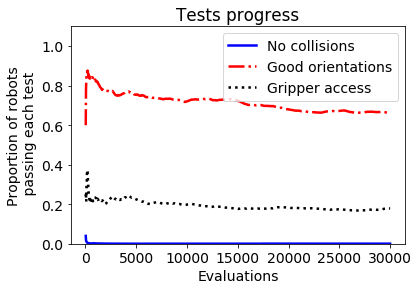

In [8]:
# Plot stuff
xValues = list(range(population, evaluations, population))
xValues = [x/population for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot(xValues, sumNoCollisions, '-', color='blue',  linewidth=2.5)
plt.plot(xValues, sumNoBadOrientations, '-.', color='red',  linewidth=2.5)
plt.plot(xValues, sumGripperAccess, ':', color='black',  linewidth=2.5)

plt.xlabel('Evaluations')
plt.ylabel('Proportion of robots\n passing each test')

axes = plt.gca()
axes.set_ylim([0,1.1])

rangeX = range(0,lenRange*5000,5000) # Why are these offsets necessary?
posX = range(0,lenRange,200) # Why are these offsets necessary?
plt.xticks(posX,rangeX)

plt.legend(['No collisions','Good orientations','Gripper access' ])
plt.title("Tests progress")
plt.savefig(repository+replicate+'manRatio.png',dpi=200)